In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [5]:
df = pd.read_excel('COVID-19-Constructed-Dataset.xlsx')
df.head()

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL
0,1,0,6,1,1,59065.136719,0,5,3,1,0,78.541451,83.166336,61.315819,64.989784,81.802025,61.637871
1,2,0,6,1,1,107480.085938,1,4,1,1,1,84.564743,82.970947,85.239334,82.694931,69.179840,72.869911
2,3,0,6,1,0,79800.843750,1,0,2,1,1,68.355804,83.814804,47.048065,78.966362,76.139626,80.808929
3,4,0,6,1,1,125976.164062,1,2,3,1,2,83.627121,92.576637,78.369659,82.449928,88.721786,70.429977
4,5,0,6,0,1,110744.156250,1,5,2,0,1,74.174385,67.225113,89.421799,80.836761,77.815231,83.921844


- $H_{0}$: Being covid positive does not have an effect on the each of the State Level scores
- $H_{A}$: Being covid positive does have an effect on the each of the State Level scores

In [15]:
from scipy.stats.contingency import crosstab, chi2_contingency
covid_writing = pd.crosstab(df['covidpos'], df['readingscore'])
covid_reading = pd.crosstab(df['covidpos'], df['writingscore'])
covid_math = pd.crosstab(df['covidpos'], df['mathscore'])
covid_writingSL = pd.crosstab(df['covidpos'], df['readingscoreSL'])
covid_readingSL = pd.crosstab(df['covidpos'], df['writingscoreSL'])
covid_mathSL = pd.crosstab(df['covidpos'], df['mathscoreSL'])

In [19]:
print(f"the p-value of covid_writing is {chi2_contingency(covid_writing).pvalue:.3f}")
print(f"the p-value is covid_reading {chi2_contingency(covid_reading).pvalue:.3f}")
print(f"the p-value is covid_math {chi2_contingency(covid_math).pvalue:.3f}\n")
print(f"the p-value is covid_writingSL {chi2_contingency(covid_writingSL).pvalue:.3f}")
print(f"the p-value is covid_readingSL {chi2_contingency(covid_readingSL).pvalue:.3f}")
print(f"the p-value is covid_math {chi2_contingency(covid_mathSL).pvalue:.3f}")

the p-value of covid_writing is 0.465
the p-value is covid_reading 0.457
the p-value is covid_math 0.464

the p-value is covid_writingSL 0.495
the p-value is covid_readingSL 0.450
the p-value is covid_math 0.465


*Each of the pvalues (0.495, 0.45, 0.465, and the state level: 0.495, 0.45, 0.465) are all bigger than the accepted alpha value 0.05, we reject the null hypothesis.

Therefore, the positive covid test has an effect on the both regular and State Level scores, writing reading and math.*

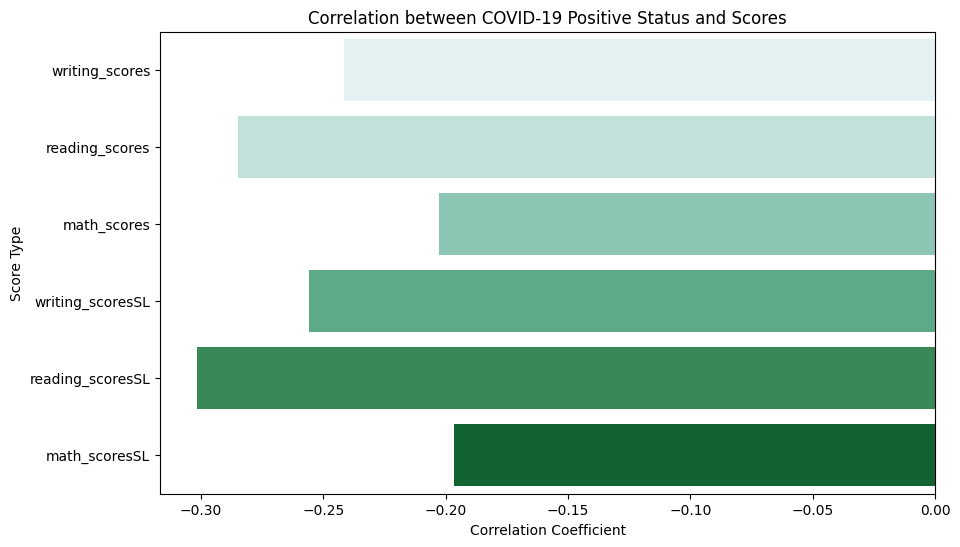

In [56]:
correlations = {
    'writing_scores': df['covidpos'].corr(df['writingscore']),
    'reading_scores': df['covidpos'].corr(df['readingscore']),
    'math_scores': df['covidpos'].corr(df['mathscore']),
    'writing_scoresSL': df['covidpos'].corr(df['writingscoreSL']),
    'reading_scoresSL': df['covidpos'].corr(df['readingscoreSL']),
    'math_scoresSL': df['covidpos'].corr(df['mathscoreSL'])
}

# Convert the correlations dictionary to a DataFrame for plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Score Type', 'Correlation'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Score Type', data=correlation_df, palette='BuGn', hue='Score Type')
plt.title('Correlation between COVID-19 Positive Status and Scores')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Score Type')
plt.show()

*We can see that among all the scores: reading, reading on the State Level, and writing on the State Level are the most negatively effected by the student getting covid.*

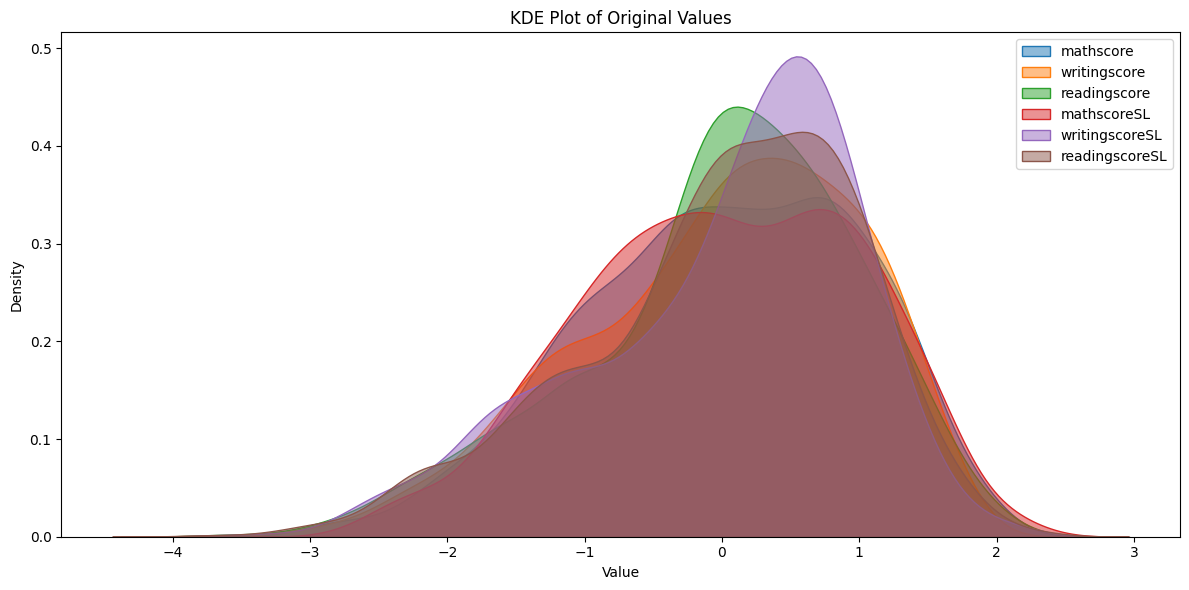

In [58]:
# Z-Scores

scores = df[['mathscore', 'writingscore', 'readingscore', 'mathscoreSL', 'writingscoreSL', 'readingscoreSL']].apply(zscore)
# KDE plot of original values with updated parameters
plt.figure(figsize=(12, 6))
for col in scores.columns:
    sns.kdeplot(scores[col], fill=True, label=col, alpha=0.5)  # Use fill=True instead of shade=True
plt.title('KDE Plot of Original Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()